In [44]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('ams20.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,NB
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,NB
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,NB
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,NB
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,NB


In [46]:
len(df)

17711

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              17711 non-null  int64  
 1   N_Person           17711 non-null  int64  
 2   Xcenter            17711 non-null  float64
 3   Ycenter            17711 non-null  float64
 4   PerXmin            17711 non-null  float64
 5   PerYmin            17711 non-null  float64
 6   PerXmax            17711 non-null  float64
 7   PerYmax            17711 non-null  float64
 8   N_Handgun          17711 non-null  int64  
 9   HgXcenter          17711 non-null  float64
 10  HgYcenter          17711 non-null  float64
 11  HgXmin             17711 non-null  float64
 12  HgYmin             17711 non-null  float64
 13  HgXmax             17711 non-null  float64
 14  HgYmax             17711 non-null  float64
 15  Intersection       17711 non-null  object 
 16  Included_Center    177

In [48]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              13809
Ycenter              13790
PerXmin              13817
PerYmin              13814
PerXmax              13817
PerYmax              13795
N_Handgun                5
HgXcenter             7278
HgYcenter             7276
HgXmin                7280
HgYmin                7280
HgXmax                7280
HgYmax                7279
Intersection             9
Included_Center          2
Intersection_Area     7778
Hg_Area               7280
Distance             17711
Ground_Truth             2
GT                       2
dtype: int64

In [49]:
df['Ground_Truth'].value_counts()

1    17054
0      657
Name: Ground_Truth, dtype: int64

In [50]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,NB,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,NB,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,NB,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,NB,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,NB,1,0,0,0,0,0,0,0,0


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17711 non-null  int64  
 1   N_Person                      17711 non-null  int64  
 2   Xcenter                       17711 non-null  float64
 3   Ycenter                       17711 non-null  float64
 4   PerXmin                       17711 non-null  float64
 5   PerYmin                       17711 non-null  float64
 6   PerXmax                       17711 non-null  float64
 7   PerYmax                       17711 non-null  float64
 8   N_Handgun                     17711 non-null  int64  
 9   HgXcenter                     17711 non-null  float64
 10  HgYcenter                     17711 non-null  float64
 11  HgXmin                        17711 non-null  float64
 12  HgYmin                        17711 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [52]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'NB', 0: 'SVM'}


In [53]:
print(df2['Ground_Truth'].value_counts())

1    17054
0      657
Name: Ground_Truth, dtype: int64


In [54]:
df3 = df2.drop(columns=["GT"])

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17711 non-null  int64  
 1   N_Person                      17711 non-null  int64  
 2   Xcenter                       17711 non-null  float64
 3   Ycenter                       17711 non-null  float64
 4   PerXmin                       17711 non-null  float64
 5   PerYmin                       17711 non-null  float64
 6   PerXmax                       17711 non-null  float64
 7   PerYmax                       17711 non-null  float64
 8   N_Handgun                     17711 non-null  int64  
 9   HgXcenter                     17711 non-null  float64
 10  HgYcenter                     17711 non-null  float64
 11  HgXmin                        17711 non-null  float64
 12  HgYmin                        17711 non-null  float64
 13  H

In [56]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14168, 28) (14168,)
(3543, 28) (3543,)


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9855386105471394
mean_test =  0.9852486852545164


,fit_time,score_time,test_score,train_score
0,0.099830,0.002992,0.983063,0.985334
1,0.099232,0.002998,0.982357,0.985570
2,0.100643,0.003987,0.984474,0.985648
3,0.099501,0.003990,0.989414,0.985491
4,0.105685,0.002992,0.985180,0.985334
5,0.103842,0.004987,0.983063,0.985570
6,0.102296,0.003970,0.985180,0.985256
7,0.105757,0.003004,0.985886,0.985413
8,0.102363,0.002985,0.989407,0.986434
9,0.102919,0.002996,0.984463,0.985336


                         feature  importance       std
0                          Frame    0.000000  0.000000
1                       N_Person    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
20     Intersection_Center_right    0.000000  0.000000
7                        PerYmax    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
10                     HgYcenter    0.000003  0.000010
23           Intersection_Inside    0.000115  0.000344
14                        HgYmax    0.001873  0.003746
19      Intersection_Center_left    0.001892  0.005676
12                        HgYmin    0.005573  0.015470
9                      HgXcenter    0.008049  0.020635
17                       Hg_Area    0.011014  0.022742
18                      Distance    0.016990  0.035125
11                        HgXmin    0.017640  0.029338
13                        HgXmax    0.023453  0.040357
26        

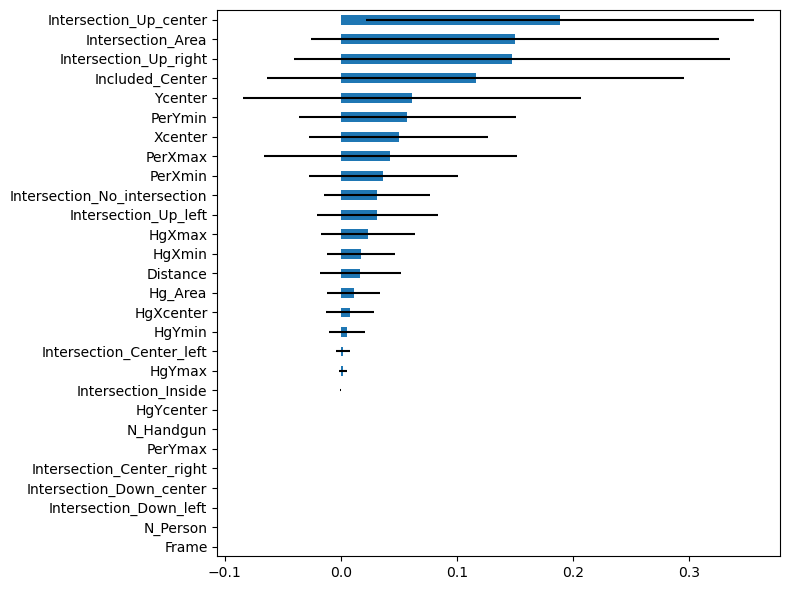

In [59]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.56      0.72       133
           1       0.98      1.00      0.99      3410

    accuracy                           0.98      3543
   macro avg       0.99      0.78      0.85      3543
weighted avg       0.98      0.98      0.98      3543



In [61]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions))

Score train =  0.9833474456675134


In [62]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='macro')

0.9850564723027644

In [63]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions, average='macro')

0.7818082596520628

In [64]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.8545620134516762

In [18]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17711 entries, 0 to 17710
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17711 non-null  int64  
 1   N_Person                      17711 non-null  int64  
 2   Xcenter                       17711 non-null  float64
 3   Ycenter                       17711 non-null  float64
 4   PerXmin                       17711 non-null  float64
 5   PerYmin                       17711 non-null  float64
 6   PerXmax                       17711 non-null  float64
 7   PerYmax                       17711 non-null  float64
 8   N_Handgun                     17711 non-null  int64  
 9   HgXcenter                     17711 non-null  float64
 10  HgYcenter                     17711 non-null  float64
 11  HgXmin                        17711 non-null  float64
 12  HgYmin                        17711 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.83525082e+00, -1.00943061e+00,  3.92531518e-01,
        -1.05612405e+00,  4.07877638e-01, -8.08607522e-01,
         3.62016794e-01, -1.40298417e+00, -4.93730571e-01,
         6.82835888e-01, -1.25598450e+00,  7.32945009e-01,
        -1.18135432e+00,  6.31122952e-01, -1.32615782e+00,
         1.23363558e+00,  3.84352440e-03, -6.29786163e-01,
        -7.30826800e-01,  2.76396675e+00, -2.81451880e-01,
        -1.68044682e-02, -1.06271786e-02, -5.25627720e-01,
        -1.13020189e+00, -1.22060885e-01, -5.92701182e-02,
        -1.23010330e-01],
       [-1.83310358e+00, -1.00943061e+00,  3.92248839e-01,
        -1.05553575e+00,  4.06907629e-01, -8.06915060e-01,
         3.62459162e-01, -1.40570532e+00, -4.93730571e-01,
         6.81231436e-01, -1.25683587e+00,  7.29930416e-01,
        -1.18200526e+00,  6.30920472e-01, -1.32721099e+00,
         1.23363558e+00,  6.43100380e-03, -6.23497761e-01,
        -7.29403892e-01,  2.76396675e+00, -2.81451880e-01,
        -1.68044682e-02, -1.06

In [22]:
print(scaler.mean_)

[8.54705099e+02 8.82445938e-01 3.90838595e+02 3.82502557e+02
 3.04576037e+02 2.46691700e+02 4.77101154e+02 5.18313415e+02
 2.95691943e-01 3.06056495e+02 3.12550162e+02 2.82968004e+02
 2.93312917e+02 3.29144987e+02 3.31787408e+02 3.96533228e-01
 8.38942379e+02 1.95167301e+03 2.36963420e+02 1.15747276e-01
 7.34007114e-02 2.82310429e-04 1.12924171e-04 2.16475637e-01
 5.60894359e-01 1.46801423e-02 3.50064931e-03 1.49059906e-02]


In [23]:
print(scaler.scale_)

[4.65715689e+02 8.74201684e-01 2.14405345e+02 6.90445510e+01
 2.22618760e+02 1.11659825e+02 2.14135084e+02 3.95943500e+01
 5.98893324e-01 1.52050434e+02 9.75348056e+01 1.51575313e+02
 9.92059184e+01 1.52988600e+02 9.63739507e+01 4.89177501e-01
 1.55659705e+03 1.69925103e+03 1.37984168e+02 3.19921621e-01
 2.60793111e-01 1.67997241e-02 1.06259785e-02 4.11842124e-01
 4.96278024e-01 1.20269014e-01 5.90626343e-02 1.21176739e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13283, 28)

In [26]:
y_train.value_counts()

1    12790
0      493
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4428, 28)

In [28]:
y_test.value_counts()

1    4264
0     164
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[9.76996262e-15, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [1.87445615e-11, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.22746299e-12, 1.00000000e+00]])

In [30]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       164
           1       1.00      1.00      1.00      4264

    accuracy                           1.00      4428
   macro avg       0.99      0.99      0.99      4428
weighted avg       1.00      1.00      1.00      4428



In [40]:
from sklearn.metrics import accuracy_score
print("Score test = ", accuracy_score(y_test,predictions_mlp))

Score train =  0.998193315266486


In [41]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_mlp, average='macro')

0.9873358348968104

In [42]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_mlp, average='macro')

0.9873358348968104

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions_mlp, average='macro')

0.9873358348968104

In [33]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9998494316043063
Score test =  0.998193315266486


In [34]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 